# Code to classification by Matteo

# Data Preprocess

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")
df = df.drop(columns=["loan_id"])
df.columns = df.columns.str.strip()
df.head(3)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [3]:
df["loan_status"] = df["loan_status"].str.strip().map({'Rejected': 0, 'Approved': 1})

In [4]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [5]:
# Identify numeric and categorical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

In [6]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [7]:
# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Scale only numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# SVM - Support Vector Machine

In [9]:
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Accuracy: 0.9461
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       323
           1       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.95      0.95      0.95       854



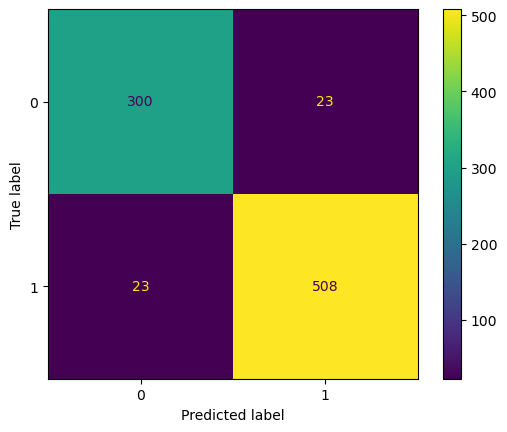

In [10]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm)).plot()

## SVM with Grid Search

In [11]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

In [12]:
svm = SVC()

# Perform GridSearchCV
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid, 
                        cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [13]:
# Fit the model
grid_svm.fit(X_train, y_train)

# Predict on test set
y_pred = grid_svm.predict(X_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   1.9s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.4s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.6s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.3s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   2.1s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   1.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END ....................C=100, gamma=0.001

In [14]:
print("Best parameters found:", grid_svm.best_params_)
print("Best cross-validated accuracy: {:.2f}%".format(grid_svm.best_score_ * 100))
print("Test set accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters found: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validated accuracy: 94.55%
Test set accuracy: 95.55%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       323
           1       0.96      0.97      0.96       531

    accuracy                           0.96       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.96      0.96      0.96       854



# GaussianNB - Naive Bayes

In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

Accuracy: 0.9485
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       323
           1       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



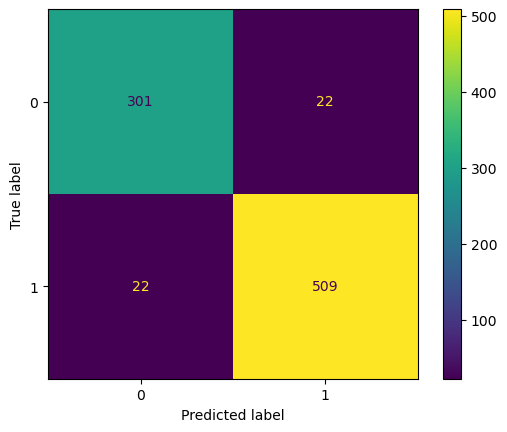

In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot()

# MLPClassifier - Multi-Layer-Perceptron

In [17]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

Accuracy: 0.9731
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       323
           1       0.97      0.98      0.98       531

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



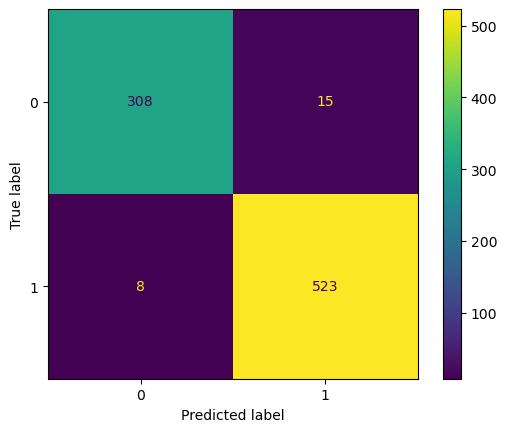

[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   1.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   1.5s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   1.7s
[CV] END ....................C=100, gamma=scale, kernel=poly; total time=   3.4s
[CV] END ........................C=100, gamma=1, kernel=poly; total time= 5.6min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.6s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ...................

In [18]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(classification_report(y_test, y_pred_mlp))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp)).plot()